<a href="https://colab.research.google.com/github/PavelStelmakhV/hw310-keras-fasion-mnist/blob/main/keras_fasion_mnist_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras import regularizers
from keras import callbacks
from keras import initializers
from keras.layers import BatchNormalization

In [38]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [39]:
# x_train = x_train.reshape(60000, 784).astype('float32') / 255
# x_test = x_test.reshape(10000, 784).astype('float32') / 255
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Перемешаем тренировочные данные
# train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [40]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [41]:
w_init = initializers.glorot_normal()
b_init = initializers.Zeros()

In [42]:
model = tf.keras.Sequential()

drop_out = 0.30
lern_rat = 0.001
neurons = 128

model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dropout(0.35))

model.add(layers.Dense(neurons * 1, activation='relu', kernel_initializer=w_init, bias_initializer=b_init)) #, kernel_regularizer=regularizers.l2(lern_rat)
model.add(BatchNormalization())
# model.add(layers.Dropout(drop_out))
model.add(layers.Dense(neurons * 2, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(drop_out))

model.add(layers.Dense(neurons * 4, activation='tanh'))
model.add(BatchNormalization())
model.add(layers.Dropout(drop_out * 1.5))

# model.add(layers.Dense(neurons * 8, activation='tanh'))
# model.add(BatchNormalization())
# model.add(layers.Dropout(drop_out * 2))

model.add(layers.Dense(10, activation='softmax'))

In [43]:
model.compile(#optimizer='adam',
              optimizer='adamax',
              # optimizer='nadam',
              # optimizer='rmsprop',
              # optimizer='sgd',
              # optimizer='adadelta',
              # loss='binary_crossentropy',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # sparse_categorical_accuracy

1/1 [==============================] - 0s 95ms/step


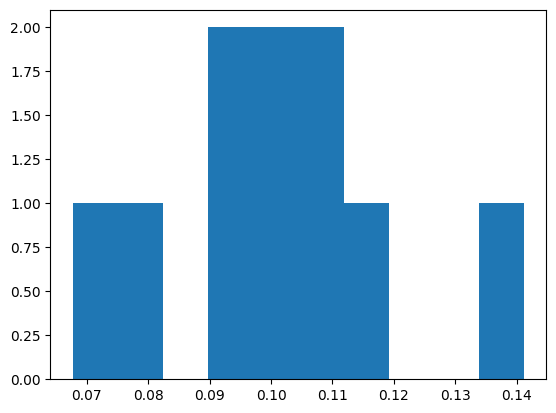

In [44]:
x = np.random.random((1, 28, 28))
a = model.predict(x)
_ = plt.hist(np.transpose(a))

In [45]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [46]:
callback = callbacks.EarlyStopping(monitor='val_loss',
                                   patience=100,
                                   restore_best_weights=True,
                                  #  baseline=0.25,
                                   )
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


In [47]:
# model.fit(train_images, train_labels, epochs=20)
history = model.fit(x_train, y_train,
                    epochs=1000,
                    batch_size=128,
                    # callbacks=[callback],
                    callbacks=[es, mc],
                    verbose=1, #многословие
                    validation_data=(x_val, y_val))
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/1000
387/391 [============================>.] - ETA: 0s - loss: 0.9436 - accuracy: 0.6857
Epoch 1: val_accuracy improved from -inf to 0.81840, saving model to best_model.h5
391/391 [==============================] - 5s 8ms/step - loss: 0.9421 - accuracy: 0.6861 - val_loss: 0.5236 - val_accuracy: 0.8184
Epoch 2/1000
 20/391 [>.............................] - ETA: 1s - loss: 0.7131 - accuracy: 0.7523

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


390/391 [============================>.] - ETA: 0s - loss: 0.6588 - accuracy: 0.7682
Epoch 2: val_accuracy improved from 0.81840 to 0.83960, saving model to best_model.h5
391/391 [==============================] - 2s 6ms/step - loss: 0.6586 - accuracy: 0.7682 - val_loss: 0.4444 - val_accuracy: 0.8396
Epoch 3/1000
389/391 [============================>.] - ETA: 0s - loss: 0.5792 - accuracy: 0.7919
Epoch 3: val_accuracy improved from 0.83960 to 0.84010, saving model to best_model.h5
391/391 [==============================] - 2s 6ms/step - loss: 0.5790 - accuracy: 0.7920 - val_loss: 0.4451 - val_accuracy: 0.8401
Epoch 4/1000
388/391 [============================>.] - ETA: 0s - loss: 0.5309 - accuracy: 0.8069
Epoch 4: val_accuracy improved from 0.84010 to 0.85320, saving model to best_model.h5
391/391 [==============================] - 2s 6ms/step - loss: 0.5308 - accuracy: 0.8068 - val_loss: 0.4009 - val_accuracy: 0.8532
Epoch 5/1000
389/391 [============================>.] - ETA: 0s - lo

In [48]:
print('\nhistory dict:', list(history.history.keys()))


history dict: ['loss', 'accuracy', 'val_loss', 'val_accuracy']


In [49]:
result = model.evaluate(x_test, y_test)
print(result)

313/313 [==============================] - 1s 2ms/step - loss: 0.2975 - accuracy: 0.8970
[0.2975074350833893, 0.8970000147819519]


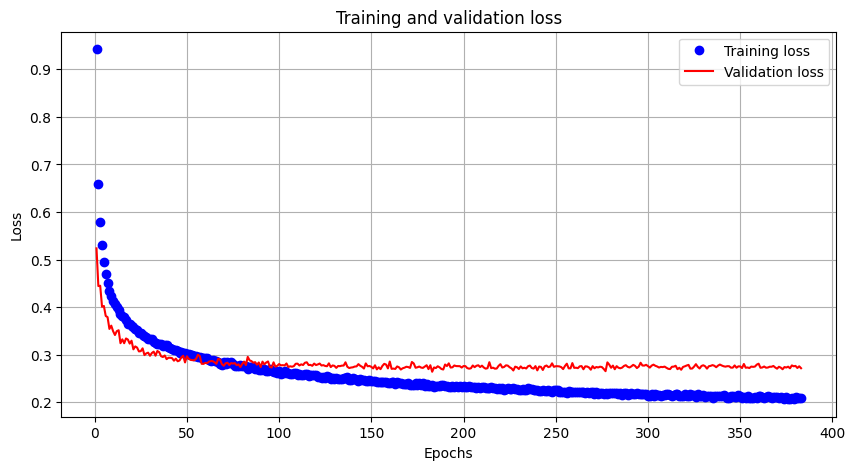

<Figure size 640x480 with 0 Axes>

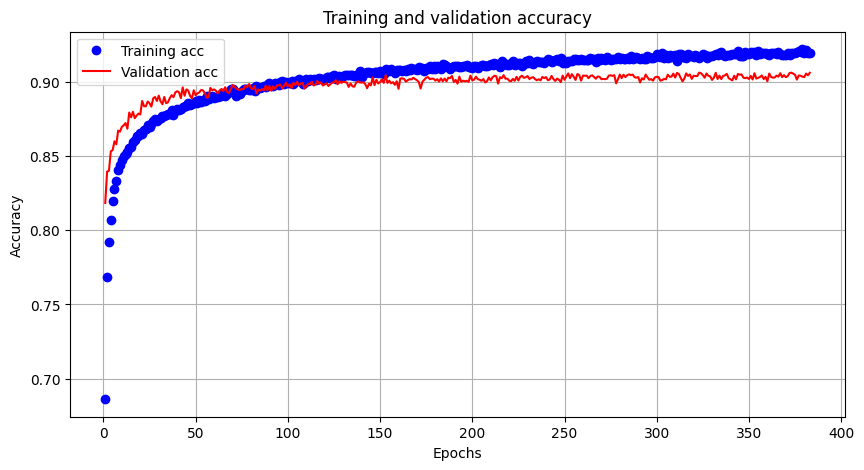

In [50]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.clf()
plt.figure(figsize=(10, 5))
val_acc_values = history_dict['accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [51]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [52]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [53]:
predictions[0]

array([0.08533976, 0.08533976, 0.08533976, 0.08533977, 0.08533976,
       0.08534399, 0.08533976, 0.08535617, 0.08533976, 0.2319215 ],
      dtype=float32)

In [54]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dropout_6 (Dropout)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 batch_normalization_6 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_7 (Bat  (None, 256)               1024      
 chNormalization)                                     